In [ ]:
# Previo toca importar paquetes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import uncertainties as un


def plot_template(title, x_label, y_label, x_lim=None, y_lim=None):
    """Genera la plantilla para mantener consistencia en el formato
    de cada tabla generada.

    Args:
        title (string): Aplica titulos.
        x_label (float): Título de eje x.
        y_label (float): Título de eje y.
        x_lim ([float], optional): Límite en eje x. Defaults to None.
        y_lim ([float], optional): Límite en eje y. Defaults to None.

    Returns:
        object: Devuelve los objetos de la gráfica modificados con la
        plantilla requerida
    """
    fig, ax = plt.subplots(  # Tamaño de la figura en pulgadas (ancho, alto)
        figsize=(10, 6)
    )

    # Configuración de rótulos y unidades
    ax.set_title(title, fontsize=16)  # Título con tamaño de fuente
    ax.set_xlabel(x_label, fontsize=14)  # Eje x con rótulo y unidades
    ax.set_ylabel(y_label, fontsize=14)  # Eje y con rótulo y unidades

    # Configuración de la escala y las dimensiones
    if x_lim is not None:
        ax.set_xlim(x_lim)  # Limitar el eje x
    if y_lim is not None:
        ax.set_ylim(y_lim)  # Limitar el eje y

    ax.grid(True, which="both", linestyle="--", alpha=0.7)  # Añadir una cuadrícula

    fig.tight_layout()  # Ajusta los elementos para que no se solapen

    return (  # Devolver las figuras y ejes para más modificaciones si es necesario
        fig,
        ax,
    )


# test
if False:
    x = np.linspace(0, 10, 100)
    fig, ax = plot_template("This is a test", "X label", "Y label", [0, 10], [-1, 1])
    ax.scatter(x, [np.sin(i) for i in x], marker="+", color="red")

# Práctica #2: Formación de Imagenes

_Andrés Felipe Pinzón y Cristian Camilo Pérez_

Universidad Nacional de Colombia

Departamento de Física y Matemáticas


## Tabla de Contenidos

- [Introducción](#introduccion)
- [Modelación Teórica](#modelacion_teorica)
- [Metodología](#metodologia)
- [Análisis y Resultados](#analisis_y_resultados)
- [Conclusiones](#conclusiones)
- [Referencias](#referencias)


## Introducción


En esta práctica experimental, se estuhiará la formación de imagenes desde la teoría de la óptica geométrica, se resolverá el sistema simple del lente convergente (positivo) estudiando los parámetros que definen el fenómeno a través del las ecuaciones que definen su comportamiento con la _ley de Gauss con la aproximación paraxial_.

Además, se verá la relación de la proporción $m$ para con la posición del lente y la relación con el foco a través de la ley de Newton, y por último, estudiaremos el comportamiento con la aproximación de la lente en un punto infinito.


## Modelación Teorica


Se estudia la formación de imagen producida por un lente convergente (positiva) con un objeto de origen $o$ a una distancia de la lente $s_o$ y $s_i$ la distancia donde la imagen se forma, también conocido como punto conjugado de $s_o$. El estudio de las propiedades de las _lentes con aproximación delgada_ es la simplificación de la ecuación de Gauss reducida a

$$\frac{1}{f} = \frac{1}{s_i} - \frac{1}{s_0}$$

Donde $f$ es el foco como parámetro característico de la lente en esta aproximación dada por la ecuación del fabricante de lentes
$$\frac{1}{f} = \frac{(n_l - n)}{n} \left( \frac{1}{R_1} - \frac{1}{R_2} \right)$$
Con $n$ siendo el aire.

También se utilizará la distancia relativa a los diferentes focos respecto la posición del objeto y la imagen para determinar la relación de la _ley de Newton_ que establece
$$x_o x_i = - f^2$$
Donde $x_o$ es la distancia del foco primario al objeto y $x_i$ la distancia del foco secundario a la imagen.

Además, se noratará que la proporción de la imagen respecto al objeto $m$ se define como
$$m = \frac{h_i}{h_o} = \frac{s_i}{s_o}$$

Utilizando la ecuación de _Newton_ se deduce
$$m = \frac{f}{x_o} \qquad m = -\frac{x_i}{f}$$

Toda la información de convención de terminos pueda ser consultada en el libro de Fundamentos de Óptica (vease [Referencias](##Referencias))


## Metodología


### Esquema experimental


Haremos uso de los siguientes dispositivos para la práctica a continuación.

1. Riel con escala métrica. $\checkmark$
2. Lente positiva. $\checkmark$
3. Objeto translúcido. $\checkmark$
4. Pantalla para observar la imagen. $\checkmark$
5. Cámara fotográfica (celular). $\checkmark$
6. Fuente luminosa (linterna). $\checkmark$
7. Cinta pegante y tijeras. $\checkmark$

Se colocará una fuente de luz que iluminará nuestro objeto difusor de la luz (papel mantequilla), de aquí filtraremos la luz para reflejar una imagen de rejilla de 8x5 puntos circulares. La imagen formada a través de la lente se reflejará sobre un papel milimetrado en la que podremos ajustar la nitidez y la proporción


![Esquema](esquema.png)


### Procedimiento Experimental


Como mediciones previas, se anoto el tamaño de los orificios verticales más distantes de la malla que funcionará como imagen en $h_o = 1.70(5) \, \text{cm}$. Posterior, hicimos un ejercicio para ajustar el rango de las mediciones, se abarcará entonces distancia mínima del objeto al lente de $s_{om} = 20.0(1) \, \text{cm}$ hasta la máxima de $s_{oM} = 50.0(1) \, \text{cm}$, donde se obtienen imagenes nitidas.

Comenzando la práctica, realizamos la medida de la distancia del objeto ($s_o$) e imagen ($s_i$) para 10 posiciones diferentes del objeto. En cada caso, se tomaron 2 mediciones de manera alternada para un total de 4 y lograr determinamos la incertidumbre a partir de estas mediciones conjuntas. En este mismo ejercicio, anotaremos la altura de los orificios más distantes de la imagen formada con $h_i$ y determinaremos el factor de proporción $m$.

Luego, escogeremos una distancia fija entre el objeto y la pantalla de la imagen, variando la posición de la lente encontraremos los 2 puntos de enfoque (imagen nítida) resultantes de aumentos recíprocos entre sí, es decir, $m$ y $1/m$.

Finalmente, se realizó la medida de la distancia de la imagen cuando el objeto se coloca a una gran distancia de la lente.


## Análisis y Resultados


Los datos obtuvidos por la primera parte de las mediciones fueron las siguientes:


Se tratan los datos para tener unas tablas que brinden información relevante del fenómeno


### Tratamiento de datos


Medidas directas:

- `ho`: Altura del objeto inicial $h_o = 17(1) \, \text{mm}$
- `O` : Posición de la lente respecto escala $O = 700(1) \, \text{mm}$
- `do` : Posición del objeto respecto escala $d_o$ ($\pm 1\, \text{mm}$).
- `di` : Posición de la imagen respecto escala $d_i$ ($\pm 1\, \text{mm}$).

Medidas indirectas:

- `so` : Posición del objeto respecto la lente $s_o$ ($\pm 2\, \text{mm}$).
- `si` : Posición de la imagen respecto la lente $s_i$ ($\pm 2\, \text{mm}$).

La propagación del error viene dada por la incertidumbre sistemática que se calcula como

$$
\sigma(g) = \left| \frac{\partial f}{\partial x} \right| \sigma(x) + \left| \frac{\partial f}{\partial z} \right| \sigma(z)
$$


In [4]:
# Datos
nominal_s = 2  # mm
nominal_h = 1  # mm

ho = 17  # \pm 0.5mm
O = 700  # \pm 1mm
do = np.array([500, 470, 440, 410, 380, 350, 320, 290, 260, 230, 480])  # 1mm
di = np.array(
    [
        [1190, 1190, 1185, 1196],
        [1090, 1086, 1088, 1083],
        [1035, 1025, 1031, 1037],
        [996, 1003, 998, 1005],
        [976, 972, 973, 970],
        [959, 955, 954, 952],
        [944, 940, 939, 944],
        [931, 937, 930, 929],
        [925, 920, 923, 925],
        [914, 912, 915, 915],
        [1119, 1117, 1113, 1114],
    ]
)
hi = np.array(
    [
        [39, 39, 39.5, 39],
        [26.50, 26.50, 27.0, 27.5],
        [21.0, 21.0, 21.0, 21.0],
        [16.0, 17.0, 16.0, 17.0],
        [14.0, 14.0, 14.0, 14.0],
        [11.0, 12.0, 12.0, 12.0],
        [10, 10, 10, 11],
        [9, 9, 9, 9],
        [8, 8, 8, 8],
        [7.5, 8, 8, 0.8],
        [29.0, 30.0, 31.0, 30.0],
    ]
)

# Parámetros
mediciones, repeticiones = di.shape
so = O - do
si = di - O

# Comprobaciones
if False:
    rows_di, cols_di = di.shape
    rows_hi, cols_hi = hi.shape
    print(rows_di, cols_di)
    print(rows_hi, cols_hi)
    print(len(si))

In [6]:
# Calcular promedios de si y hi
si_mean = np.array([np.mean(row) for row in si])
si_uncertain = np.array([np.std(row) / np.sqrt(repeticiones) for row in si])
hi_mean = np.array([np.mean(row) for row in hi])
hi_uncertain = np.array([np.std(row) / np.sqrt(repeticiones) for row in hi])

# Incertidumbre real (respecto la estadística y la nominal)
si_uncertain = np.sqrt(si_uncertain**2 + nominal_s**2)
hi_uncertain = np.sqrt(hi_uncertain**2 + nominal_h**2)


# Comprobaciones
if False:
    print(len(hi_mean), len(hi_uncertain))
    print(
        *[f"{si_mean[i]:.0f} - {si_uncertain[i]:1.0f}" for i in range(len(si_mean))],
        sep="\n",
    )

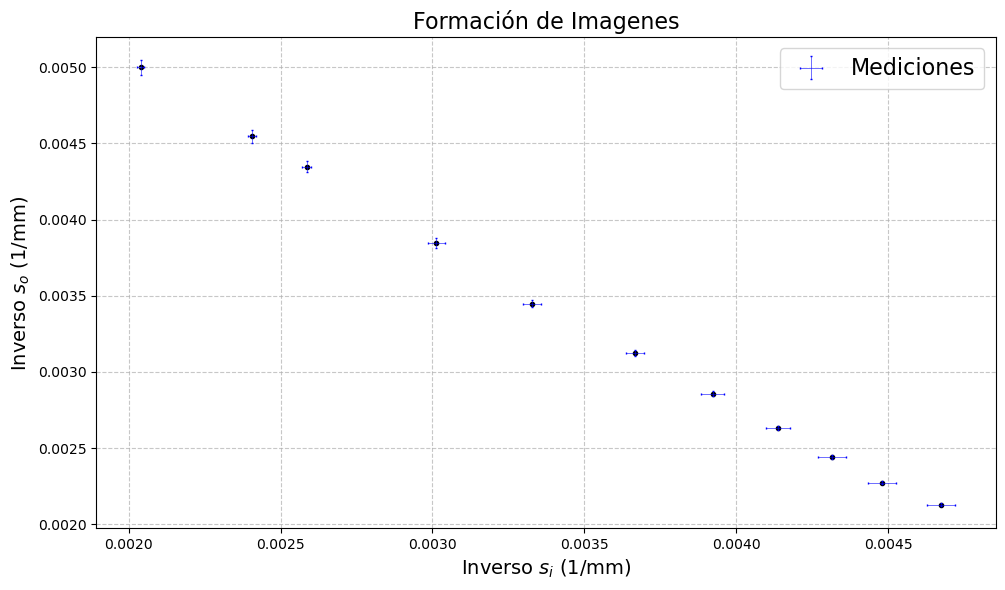

In [ ]:
# inversos
x_vals = 1 / si_mean
u_x_vals = si_uncertain / si_mean**2
y_vals = 1 / so
u_y_vals = nominal_s / so**2

# Plottting
fig, ax = plot_template(
    title="Formación de Imagenes",
    x_label="Inverso $s_i$ (1/mm)",
    y_label="Inverso $s_o$ (1/mm)",
)
# errores
ax.errorbar(
    x_vals,
    y_vals,
    xerr=u_x_vals,
    yerr=u_y_vals,
    linestyle="none",
    color="blue",
    capsize=1,
    capthick=1,
    lw=0.4,
    label="Mediciones",
)
# datos
ax.scatter(x_vals, y_vals, marker=".", color="black")

ax.legend(fontsize=16)
plt.show()

#### opcional


In [ ]:
# Crear el DataFrame
df = pd.DataFrame(
    {
        "so (mm)": so,
        "Promedio si (mm)": si_mean,
        "Incertidumbre si (mm)": si_uncertain,
        "Promedio hi (mm)": hi_mean,
        "Incertidumbre hi (mm)": hi_uncertain,
    }
)

# comprobar
if False:
    print(df)

# Parte 3

# Magnificacion m

so = 50
si = 120

OM = [(696,697,695,698)]

# magnificacion 1/m

Om = [(983,987,986, 983)]


# Parte final

O = 98

si = [1143, 1148, 1146, 1148,1144, 1142,1142, 1145,1146,1144s]


## Conclusiones


## Referencias

Mejía Barbosa, Y. (2020). Fundamentos de óptica : Curso introductorio. Universidad Nacional de Colombia. Facultad de Ciencias.
